In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from pydataset import data
from sklearn.model_selection import train_test_split
import prepare

np.random.seed(123)

In [ ]:
df_iris = data('iris')
df_iris.head()

# 4) Iris Data

## print the first 3 rows

In [ ]:
df_iris.head(3)

## print the number of rows and columns (shape)

In [ ]:
df_iris.shape

## print the column names

In [ ]:
df_iris.columns

## print the data type of each column

In [ ]:
df_iris.dtypes

## print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics

In [ ]:
df_iris.describe() # No Recommendation to rescale

# 5) Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

In [ ]:
df_excel = pd.read_excel('telco_churn.xlsx')
df_excel

## assign the first 100 rows to a new dataframe, df_excel_sample

In [ ]:
df_excel_sample = df_excel.head(100)
df_excel_sample.shape

## print the number of rows of your original dataframe

In [ ]:
df_excel.shape[0]

## print the first 5 column names

In [ ]:
df_excel.columns[0:5]

## print the column names that have a data type of object

In [ ]:
df_excel.select_dtypes(include='object').columns


## compute the range for each of the numeric variables.

In [ ]:
df_excel.monthly_charges.max() - df_excel.monthly_charges.min()

In [ ]:
df_excel.total_charges.max() - df_excel.total_charges.min()

# 6) Read the data from this google sheet into a dataframe, df_google

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

In [ ]:
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
csv_export_url

In [ ]:
df_googlesheet = pd.read_csv(csv_export_url)

In [ ]:
df_googlesheet.head()

## print the first 3 rows

In [ ]:
df_googlesheet.head(3)

## print the number of rows and columns

In [ ]:
df_googlesheet.shape

## print the column names

In [ ]:
df_googlesheet.columns

## print the data type of each column

In [ ]:
df_googlesheet.dtypes

## print the summary statistics for each of the numeric variables

In [ ]:
df_googlesheet.describe()

## print the unique values for each of your categorical variables

In [ ]:
for col in df_googlesheet.columns:
    if df_googlesheet[col].dtypes == 'object':
        print(f'{col} has {df_googlesheet[col].nunique()} unique values')

In [ ]:
df_googlesheet.Sex.value_counts()

In [ ]:
df_googlesheet.Pclass.value_counts()

In [ ]:
df_googlesheet.Survived.value_counts()

# Data Aquisition Functions -> acquire.py

## 1) Make a function named get_titanic_data that returns the titanic data from the codeup data science database as a pandas data frame. Obtain your data from the Codeup Data Science Database.

In [ ]:
def get_connection(db_name):
    from env import host, user, password
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'

In [ ]:
df_titanic = pd.read_sql('SELECT * FROM passengers', get_connection('titanic_db'))
df_titanic.head()

In [ ]:
def get_titanic_data():
    return pd.read_sql('SELECT * FROM passengers', get_connection('titanic_db'))

## 2) Make a function named get_iris_data that returns the data from the iris_db on the codeup data science database as a pandas data frame. The returned data frame should include the actual name of the species in addition to the species_ids. Obtain your data from the Codeup Data Science Database.

In [ ]:
df_iris = pd.read_sql('SELECT * FROM species JOIN measurements USING (species_id)', get_connection('iris_db'))
df_iris.head()

In [ ]:
def get_iris_data():
    return pd.read_sql('SELECT * FROM species JOIN measurements USING (species_id)', get_connection('iris_db'))

## 3) Make a function named get_telco_data

In [ ]:
df_telco = pd.read_sql('''SELECT * FROM customers c
                       JOIN contract_types ct ON ct.contract_type_id=c.contract_type_id
                       JOIN internet_service_types ist ON ist.internet_service_type_id=c.internet_service_type_id
                       JOIN payment_types pt ON pt.payment_type_id=c.payment_type_id
                       '''
                       , get_connection('telco_churn'))
df_telco.head()

In [ ]:
def get_telco_data():
    sql = '''SELECT * FROM customers c
                       JOIN contract_types ct ON ct.contract_type_id=c.contract_type_id
                       JOIN internet_service_types ist ON ist.internet_service_type_id=c.internet_service_type_id
                       JOIN payment_types pt ON pt.payment_type_id=c.payment_type_id
                       '''
    url = get_connection('telco_churn')
    return pd.read_sql(sql, url)

# 4) Add caching to Functions. 

In [ ]:
def get_titanic_data():
    import os
    file_name = 'titanic.csv'
    if os.path.isfile(file_name): # checks if file exist
        df = pd.read_csv(file_name) # assigns df to read on return
    else:
        sql = '''
        'SELECT * FROM passengers'
        '''
        url = get_connection('titanic_db')
        df = pd.read_sql(sql, url) #creates df
        df.to_csv(file_name) # converts df to csv file
    return df

In [ ]:
get_titanic_data().head()

In [ ]:
def get_iris_data():
    import os
    file_name = 'iris.csv'
    if os.path.isfile(file_name):
        df = pd.read_csv(file_name)
    else:
        sql = '''
        SELECT * FROM species 
        JOIN measurements USING (species_id)
        '''
        url = get_connection('iris_db')
        df = pd.read_sql(sql,url)
        df.to_csv(file_name)
    return df

In [ ]:
get_iris_data().head()

In [ ]:
def get_telco_data():
    import os
    file_name = 'telco.csv'
    if os.path.isfile(file_name):
        df = pd.read_csv(file_name)
    else:
        sql = '''
        SELECT * FROM customers c
        JOIN contract_types ct ON ct.contract_type_id=c.contract_type_id
        JOIN internet_service_types ist ON ist.internet_service_type_id=c.internet_service_type_id
        JOIN payment_types pt ON pt.payment_type_id=c.payment_type_id
        '''
        url = get_connection('telco_churn')
        df = pd.read_sql(sql, url)
        df.to_csv(file_name)
    return df

In [ ]:
get_telco_data().head()

# Data Prep Exercises

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# import our own acquire moduleimport acquire

## Iris Data:

### 1) Use the function defined in acquire.py to load the iris data.

In [ ]:
import acquire
df = acquire.get_iris_data()
df.head()

### 2) Drop the species_id and measurement_id columns.

In [ ]:
df = df.drop(columns=['species_id','measurement_id'])
df

### 3) Rename the species_name column to just species.

In [ ]:
df = df.rename(columns={'species_name':'species'})
df.head()

### 4) Create dummy variables of the species name and concatenate onto the iris dataframe

In [ ]:
df_species = pd.get_dummies(df.species, prefix='is')
df = pd.concat([df, df_species], axis=1)
df

### 5) Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [ ]:
def prep_iris():
    df = acquire.get_iris_data()
    df = df.drop(columns=['species_id','measurement_id'])
    df = df.rename(columns={'species_name':'species'})
    df_species = pd.get_dummies(df.species, prefix='is')
    df = pd.concat([df, df_species], axis=1)
    return df

# Titanic Data

## 1) Use the function defined in acquire.py to load the Titanic data.

In [ ]:
import acquire
df = acquire.get_titanic_data()
df.head()

## 2) Drop any unnecessary, unhelpful, or duplicated columns.

In [ ]:
drop_col = ['embarked','fare', 'class', 'deck', 'age']
df = df.drop(columns = drop_col)
df.head()

## 3) Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe

In [ ]:
df.info()

In [ ]:
obj_cols = df.columns[[df[col].dtypes == 'O' for col in df.columns]]
for col in obj_cols:
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True, dropna=False))
    print('-------------------------------')

In [ ]:
df['embark_town'] = df.embark_town.fillna(value='Southampton')
df.info()

In [ ]:
dummies_df = pd.get_dummies(df, columns = ['sex', 'embark_town'], drop_first=[True,True])
dummies_df.info()

In [ ]:
dummies_df.head()

In [ ]:
df = pd.concat([df,dummies_df], axis=1)
df.head()

## 4) Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [ ]:
def prep_titanic():
    df = acquire.get_titanic_data()
    drop_col = ['embarked','fare', 'class', 'deck', 'age']
    df = df.drop(columns = drop_col)
    df['embark_town'] = df.embark_town.fillna(value='Southampton')
    dummies_df = pd.get_dummies(df, columns = ['sex', 'embark_town'], drop_first=[True,True])
    df = pd.concat([df,dummies_df], axis=1)
    return df
    

# Telco Data

## 1) Use the function defined in acquire.py to load the Telco data.

In [ ]:
import acquire
df = acquire.get_telco_data()
df.head()

## 2) Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
df.duplicated().any()

In [ ]:
# check if columns are duplicated
df.duplicated(subset=['internet_service_type_id','internet_service_type_id.1']).any()

In [ ]:
# check if columns are duplicated
df.duplicated(subset=['contract_type_id','contract_type_id.1']).any()

In [ ]:
# check if columns are duplicated
df.duplicated(subset=['payment_type_id','payment_type_id.1']).any()

In [ ]:
drop_cols = ['internet_service_type_id',
             'internet_service_type_id.1',
             'contract_type_id',
             'contract_type_id.1',
             'payment_type_id',
             'payment_type_id.1']

In [ ]:
df = df.drop(columns=drop_cols)
df.shape

In [ ]:
df.info()

In [ ]:
# shows 11 blank values
df.total_charges.value_counts()

In [ ]:
# show no na values
df[df.total_charges.isna()]

In [ ]:
# shows no null values
df[df.total_charges.isnull()]

In [ ]:
# show total_charges with blank values
df[df.total_charges == ' '].head()

In [ ]:
# replace blank spaces with zeros
df['total_charges'] = df.total_charges.replace(' ', '0')

In [ ]:
# confirmed no more blank values
df[df.total_charges == ' ']

In [ ]:
# convert total charges from object to float
df.total_charges = df.total_charges.astype(float)

In [ ]:
# confirmed change to float
df.info()

In [ ]:
obj_cols = df.columns[[df[col].dtypes == 'O' for col in df.columns]]
obj_cols

In [ ]:
for col in obj_cols:
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True, dropna=False))
    print('-------------------------------------')

## 3) Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [ ]:
df.columns.to_list()

In [ ]:
# identified columns to encode and assigned to variable
dummies_cols = [
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

In [ ]:
# performed get_dummmies function to create dummy variables
dummies_df = pd.get_dummies(df[dummies_cols], drop_first=True)
dummies_df.columns.to_list()

In [ ]:
# concat fd with new dummy variable columns
df = pd.concat([df, dummies_df], axis=1)
df.columns.to_list()

## 4) Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [ ]:
def prep_telco():
    df = acquire.get_telco_data()
    # id cols to drop
    drop_cols = ['internet_service_type_id',
             'internet_service_type_id.1',
             'contract_type_id',
             'contract_type_id.1',
             'payment_type_id',
             'payment_type_id.1']
    # drop columns
    df = df.drop(columns=drop_cols)
    # replace blank spaces with zeros
    df['total_charges'] = df.total_charges.replace(' ', '0')
    # convert total charges from object to float
    df.total_charges = df.total_charges.astype(float)
    # id columns for dummy variables
    dummies_cols = [
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']
    # creaet dummy variables and assign to variable
    dummies_df = pd.get_dummies(df[dummies_cols], drop_first=True)
    # concat df with dummy variable columns
    df = pd.concat([df, dummies_df], axis=1)
    return df
    

In [ ]:
prep_telco()

In [ ]:
### created prepare.py file

# Split Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df = prepare.prep_titanic()
df.head()

In [ ]:
def split_titanic(df):
    train_validate, test = train_test_split(df, 
                                             test_size=.2, 
                                             random_state=123, 
                                             stratify=df.survived)
    train, validate = train_test_split(train_validate,
                                      test_size=.3,
                                      random_state=123,
                                      stratify=train_validate.survived)
    return train, validate, test

In [ ]:
# assign split portions to variables for print
train, validate, test = split_titanic(df)

In [ ]:
# print to validate the split
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')


In [ ]:
df = prepare.prep_iris()
df

In [ ]:
def split_iris(df):
    train_validate, test = train_test_split(df, 
                                             test_size=.2, 
                                             random_state=123, 
                                             stratify=df.species)
    train, validate = train_test_split(train_validate,
                                      test_size=.3,
                                      random_state=123,
                                      stratify=train_validate.species)
    return train, validate, test

In [ ]:
# assign split portions to variables for print
train, validate, test = split_iris(df)

In [ ]:
# print to validate the split
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

In [ ]:
df = prepare.prep_telco()
df.head()

In [ ]:
def split_telco(df):
    train_validate, test = train_test_split(df, 
                                             test_size=.2, 
                                             random_state=123, 
                                             stratify=df.churn)
    train, validate = train_test_split(train_validate,
                                      test_size=.3,
                                      random_state=123,
                                      stratify=train_validate.churn)
    return train, validate, test

In [ ]:
# assign split portions to variables for print
train, validate, test = split_telco(df)

In [ ]:
# print to validate the split
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

# Exploratory Analysis

## Exercise I - Explore Iris Data

### 1) Acquire, prepare & split your data.

In [ ]:
import prepare

In [ ]:
df = prepare.prep_iris()
df.head()

In [ ]:
train, validate, test = prepare.split_iris(df)

In [ ]:
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

In [ ]:
train.info()

### 2) Univariate Stats

- 1) For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [ ]:
train.columns.to_list()

In [ ]:
# id columns to keep
cols_counts = ['sepal_length',
 'sepal_width',
 'petal_length',
 'petal_width',]

In [ ]:
# create subset of train df
train_cols = train[cols_counts]
train_cols.head()

In [ ]:
# create histograms for each column id'd
for col in train_cols:
    plt.hist(train_cols[col])
    plt.title(col)
    plt.show()

In [ ]:
# create boxplot for each column id'd
for col in train_cols:
    plt.boxplot(train_cols[col])
    plt.title(col)
    plt.show()

In [ ]:
# compute descriptive statistics for columns id'
train_cols.describe()

- 2) For each species (categorical variable): create a frequency table and a bar plot of those frequencies

In [ ]:
train_setosa = train[train.species == 'setosa']
train_setosa = train_setosa[['sepal_width', 'sepal_length', 'petal_width', 'petal_length']]
train_setosa.value_counts()

In [ ]:
sns.barplot(data=train_setosa)
plt.title('Setosa Sepal Measurements Larger than Petal Measurment')

In [ ]:
train.species.value_counts()

In [ ]:
train_virginica = train[train.species == 'virginica']
train_virginica = train_virginica[['sepal_width', 'sepal_length', 'petal_width', 'petal_length']]
train_virginica.head()

In [ ]:
sns.barplot(data=train_virginica)
plt.title('Virginica Lengths Larger than Widths')

In [ ]:
train_versicolor = train[train.species == 'versicolor']
train_versicolor = train_versicolor[['sepal_width', 'sepal_length', 'petal_width', 'petal_length']]
train_versicolor.head()

In [ ]:
sns.barplot(data=train_versicolor)
plt.title('Versicolor Lengths are Larger than Widths')

- 3) Document takeaways & any actions.
* sepal_width has one outlier
* Setosa Sepal Measurements Larger than Petal Measurment
* Virginica Lengths Larger than Widths
* Versicolor Lengths are Larger than Widths

### 3) Bivariate Stats

- 1) Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

In [ ]:
cols_used = ['species',
 'sepal_length',
 'sepal_width',
 'petal_length',
 'petal_width']

In [ ]:
train_cols = train[cols_used]
train_cols.head()

In [ ]:
sns.barplot(x='species', y='sepal_length', data=train_cols)
sepal_length_mean = train_cols.sepal_length.mean()
plt.axhline(sepal_length_mean, label='Sepal Length Mean')
plt.legend()
plt.show()

In [ ]:
sns.barplot(x='species', y='sepal_width', data=train_cols)
sepal_width_mean = train_cols.sepal_width.mean()
plt.axhline(sepal_width_mean, label='Sepal Width Mean')
plt.legend()
plt.show()

In [ ]:
sns.barplot(x='species', y='petal_length', data=train_cols)
petal_length_mean = train_cols.petal_length.mean()
plt.axhline(petal_length_mean, label='Petal Length Mean')
plt.legend()
plt.show()

In [ ]:
sns.barplot(x='species', y='petal_width', data=train_cols)
petal_width_mean = train_cols.petal_width.mean()
plt.axhline(petal_width_mean, label='Petal Width Mean')
plt.legend()
plt.show()

- 2) For each measurement type, compute the descriptive statistics for each species.

In [ ]:
train_setosa.describe()

In [ ]:
train_virginica.describe()

In [ ]:
train_versicolor.describe()

- 3) For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [ ]:
t, p = stats.mannwhitneyu(train_virginica.sepal_width, train_versicolor.sepal_width)
t, p # there is significant difference betweeen Virginica & Versicolor Sepal Widths

In [ ]:
t, p = stats.mannwhitneyu(train_virginica.sepal_length, train_versicolor.sepal_length)
t, p # There are significant differences between Virginica & Versicolor Sepal Lengths

In [ ]:
t, p = stats.mannwhitneyu(train_virginica.petal_width, train_versicolor.petal_width)
t, p # There are significant differences between Virginica & Versicolor Petal Widths

In [ ]:
t, p = stats.mannwhitneyu(train_virginica.petal_length, train_versicolor.petal_length)
t, p # There are significant differences between Virginica & Versicolor Petal Lengths

- 4) Document takeaways & any actions.

* ?????

### 4) Multivariate Stats

- 1) Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

In [ ]:
sns.pairplot(data=train_cols, hue='species')

- 2) Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col

In [ ]:
sns.relplot(data=train, x='sepal_length', y='sepal_width', hue='species')

- 3) Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization

In [ ]:
train_melt = train_cols.melt(id_vars='species')
train_melt

In [ ]:
sns.swarmplot(data=train_melt, x='variable', y='value', hue='species')

### Document Take Aways
- Setosa Petal Length is significantly samller than others
- Sepal Wideth is mixed between all species

- 4) Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

In [ ]:
train_areas = train_cols.copy()

In [ ]:
train_areas['sepal_areas'] = (train_areas.sepal_length) * (train_areas.sepal_width)
train_areas.head()

In [ ]:
train_areas['petal_areas'] = (train_areas.petal_length) * (train_areas.petal_width)
train_areas.head()

In [ ]:
train_areas = train_areas[['species',
 'sepal_areas',
 'petal_areas']]
train_areas.head()

In [ ]:
# remove species: versicolor
setosa_virginica_areas = train_areas[(train_areas.species=='setosa') | (train_areas.species=='virginica')]
setosa_virginica_areas.head()

In [ ]:
# create plot
sns.barplot(x='species', y='sepal_areas', data=setosa_virginica_areas)
plt.title('No Significant Difference Between Setosa / Virginica Sepal Areas')

### Sepal Area is not significantly different between Setosa and Virginica

In [ ]:
sns.scatterplot(data=setosa_virginica_areas, x='species', y='sepal_areas')
plt.title('No Significant Difference')

### Use T-Test or MannWhitney for Hypothesis Test

In [ ]:
setosa_sepal_areas = setosa_virginica_areas[setosa_virginica_areas.species=='setosa'].sepal_areas
virginica_sepal_areas = setosa_virginica_areas[setosa_virginica_areas.species=='virginica'].sepal_areas

In [ ]:
t, p = stats.mannwhitneyu(setosa_sepal_areas,virginica_sepal_areas )
t, p # No significant differnce between Setosa & Virginica Sepal Areas

- 5) Document takeaways and any actions.
* No Sigficant difference between Setosa and Virginica Sepal Areas

# Exercise II - Explore Titanic Data

In [ ]:
# Aquire Data
df = prepare.prep_titanic()
df.head()

In [ ]:
df.sibsp.value_counts()

In [ ]:
# Split Data
train, validate, test = prepare.split_titanic(df)
train.shape, validate.shape, test.shape

In [ ]:
# print Split Amounts
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

### Determine drivers of the target variable

In [ ]:
train.survived.hist()
plt.title('More Did Not Survive')
plt.show()

In [ ]:
train.pclass.hist()
plt.title('More 3rd Class')
plt.show()

In [ ]:
train.sex_male.hist()
plt.title('More Males')

In [ ]:
train.embark_town.hist()
plt.title('More from Southampton')
plt.show()

In [ ]:
train.sibsp.hist()
plt.title('Most had No Siblings or Spouses')

In [ ]:
train.parch.hist()
plt.title('Most had no parent/child relationships')
plt.show()

In [ ]:
train.alone.hist()
plt.title('Most Where Alone')
plt.show()

### Determine if certain columns should be dropped

In [ ]:
# I could drop embark_town and sex

### Determine if it would be valuable to bin some numeric columns

In [ ]:
# would bin ages and fares columns but they were removed during prep

### Determine if it would be valuable to combine multiple columns into one.

In [ ]:
# no need to combine comlumns

### Does it make sense to combine any features?

In [ ]:
# Combine sibsp and parch to get group_size 

In [ ]:
train['group_size'] = train.sibsp + train.parch
train_gs = train.group_size.value_counts().to_frame()
train_gs = train_gs.reset_index()
train_gs = train_gs.rename(columns={'index':'group_size', 'group_size':'group_count'})
train_gs

In [ ]:
train.group_size.describe()

In [ ]:
sns.barplot(data=train_gs, x='group_size', y='group_count')

### Do you find any surprises?

In [ ]:
train.head()

In [ ]:
sns.barplot(data=train, x='sex', y='survived')

In [ ]:
sns.barplot(data=train, x='pclass', y='survived', hue='sex')
plt.title('More Females Survived Across Pclass')
plt.show()

In [ ]:
sns.barplot(data=train, x='pclass', y='survived', hue='alone', )
plt.title('More Non-Alone Survived Across Pclass')
plt.show()

In [ ]:
sns.barplot(data=train, x='group_size', y='survived')
plt.title('More Groups 1-3 Survived Across Pclass')
plt.show()

In [ ]:
sns.barplot(data=train, x='group_size', y='survived', hue='pclass')
plt.title('More Groups 1-3 Survived Across Pclass')

### Document any and all findings and takeaways in your notebook using markdown.
- More Died than Survived
- There were an many 3rd class passengers as there were 1st and 2nd combined
- There were twice as many Males than Females
- 3 times as many passengers embarked fomr Southampton
- Twice as many passengers were alone than not
- More Females survived across all pclass
- 

# <font color='red'> Exercise III - Explore Telco Data

## 1) Explore your telco data to discover drivers of churn

In [5]:
# get prep'd data
df = prepare.prep_telco()
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,Yes,Yes,...,1,1,0,0,1,0,0,0,0,1
1,0017-DINOC,Male,0,No,No,54,No,No phone service,Yes,No,...,0,0,0,0,1,0,0,1,0,0
2,0019-GFNTW,Female,0,No,No,56,No,No phone service,Yes,Yes,...,0,0,0,0,1,0,0,0,0,0
3,0056-EPFBG,Male,0,Yes,Yes,20,No,No phone service,Yes,No,...,0,1,0,0,1,0,0,1,0,0
4,0078-XZMHT,Male,0,Yes,No,72,Yes,Yes,No,Yes,...,1,1,0,0,1,0,0,0,0,0


In [7]:
# split data using split_telco function that stratifies churn
train, validate, test = prepare.split_telco(df)
train.shape, validate.shape, test.shape

((3943, 49), (1691, 49), (1409, 49))

In [8]:
# created copy of train
train_telco = train.copy()

In [23]:
# Univariat analysis using histograms
# id columns to keep
cols_data = ['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']
cols_data



['customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

In [24]:
train_telco_cols = train_telco[cols_data]
train_telco_cols.head()

,customer_id,gender,senior_citizen,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
5642,1982-FEBTD,Female,0,0,Yes,Yes,23,Yes,Yes,No internet service,...,No internet service,No internet service,No internet service,Yes,25.60,514.75,No,Two year,None,Credit card (automatic)
3338,8982-NHAVY,Male,0,0,No,No,27,Yes,Yes,No,...,No,Yes,Yes,Yes,100.50,2673.45,No,One year,Fiber optic,Bank transfer (automatic)
4273,4115-NZRKS,Female,1,1,No,No,7,Yes,No,No,...,No,Yes,Yes,Yes,89.15,574.35,No,Month-to-month,Fiber optic,Electronic check
2382,9633-DENPU,Female,0,0,Yes,No,47,Yes,No,No,...,No,Yes,No,Yes,58.60,2723.40,No,Month-to-month,DSL,Bank transfer (automatic)
2655,5693-PIPCS,Male,0,0,No,No,41,Yes,No,No,...,Yes,Yes,Yes,Yes,99.65,4220.35,No,Two year,Fiber optic,Credit card (automatic)


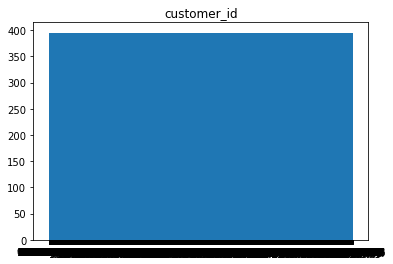

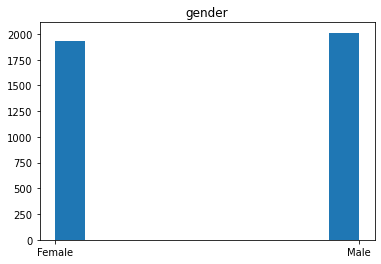

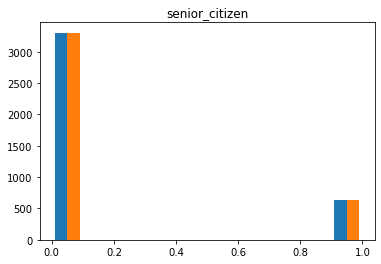

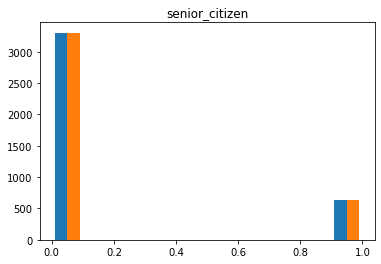

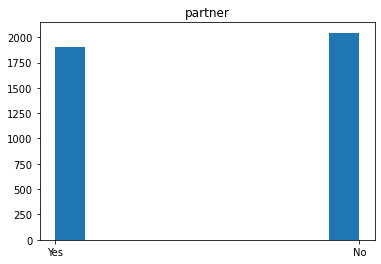

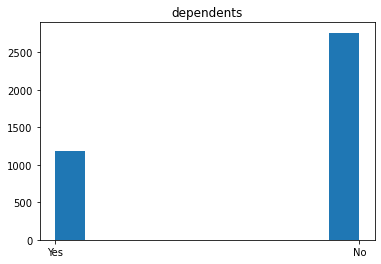

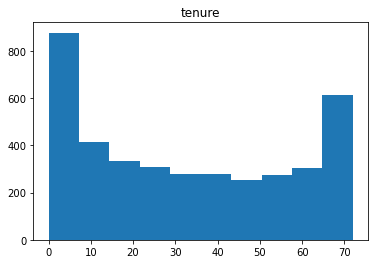

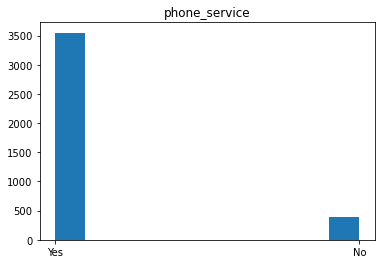

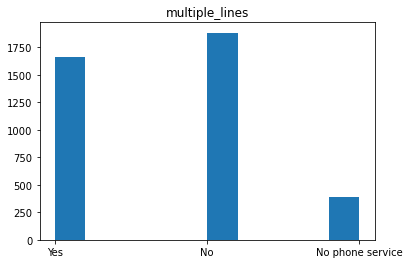

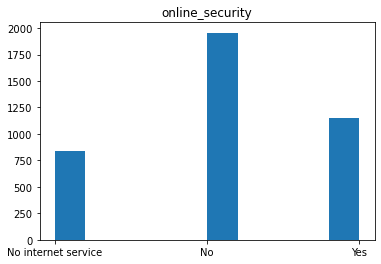

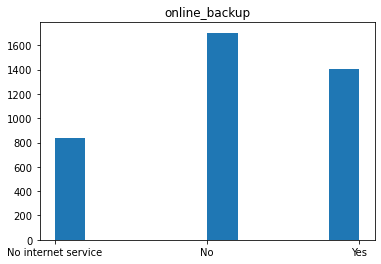

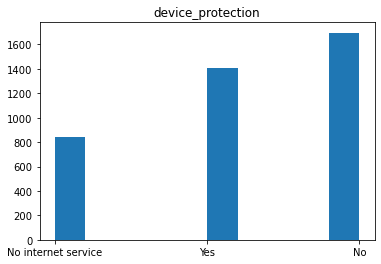

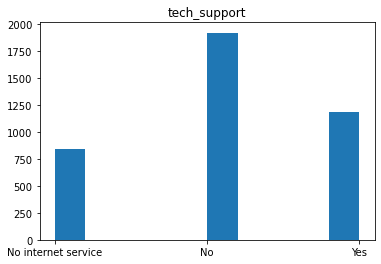

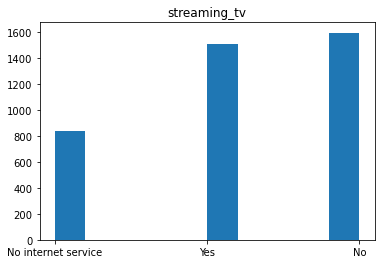

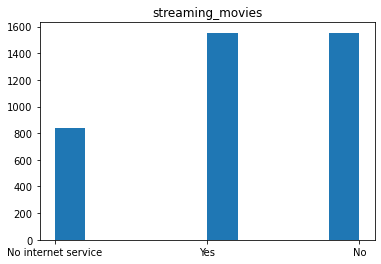

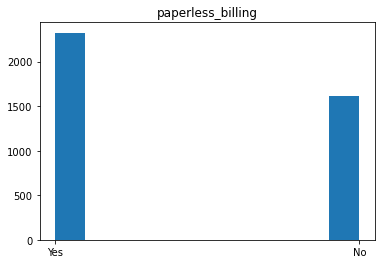

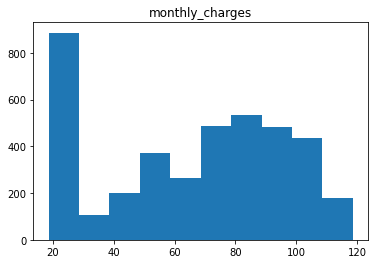

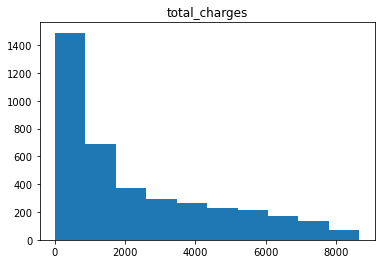

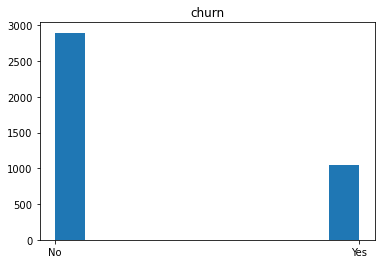

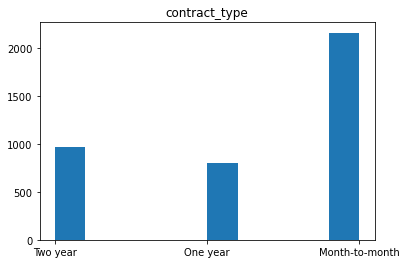

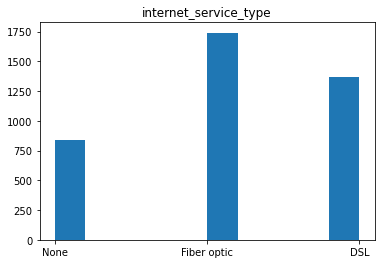

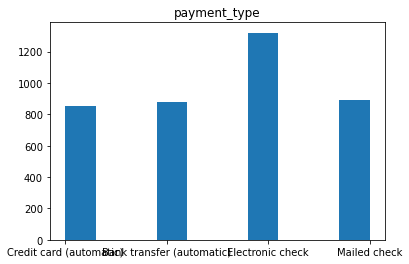

In [26]:
for col in train_telco_cols:
    plt.hist(train_telco_cols[col])
    plt.title(col)
    plt.show()

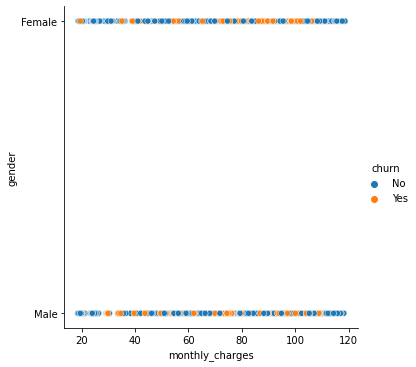

In [22]:
# show rel plot
sns.relplot(data=train_telco,
           y='gender', 
           x='monthly_charges',
           kind='scatter',
           hue='churn')

In [11]:
# show pair plot
sns.pairplot(train_telco, hue='churn')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

## 2) Determine if certain columns should be dropped

## 3) Determine if it would be valuable to bin some numeric columns

## 4) Determine if it would be valuable to combine multiple columns into one.

## 5) What are your drivers of churn?

## 6) Does it make sense to combine any features?

## 7) Do you find any surprises?

## 8) Document any and all findings and takeaways in your notebook using markdown.